In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('forest_updated1')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
X = df.drop(columns=['Temperature','year'],axis=1)
y = df['Temperature']
X.columns

Index(['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'classes'],
      dtype='object')

In [4]:
for col in ['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']:
    print(col,df[col].skew())

day 0.002806412610718461
month 0.0
RH -0.23796439326918462
Ws 0.5458812499001592
Rain 4.57907059640398
FFMC -1.3256332623474232
DMC 1.5276523856829873
DC 1.479055794047031
ISI 1.1219754608509633
BUI 1.4590686080976978
FWI 1.151819035687952


In [17]:
def detect_outliers(col):
    print("Mean value ",df[col].mean())
    print("Std value ",df[col].std())
    print("Min value ",df[col].min())
    print("Max value ",df[col].max())
    # Finding the boundary values
    upper_bound = df[col].mean() + 3*df[col].std()
    lower_bound = df[col].mean() - 3*df[col].std()
    print("Highest allowed",upper_bound)
    print("Lowest allowed",lower_bound)
    # Finding the outliers
    df[col] = np.where(df[col]>upper_bound, upper_bound, np.where(df[col]<lower_bound,lower_bound,df[col]))
    return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

C:\Users\SatyaAnshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SatyaAnshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SatyaAnshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SatyaAn

TypeError: Horizontal orientation requires numeric `x` variable.

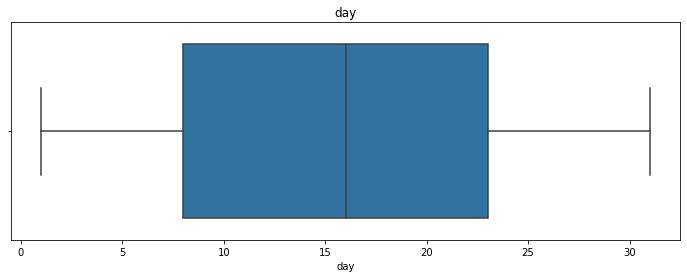

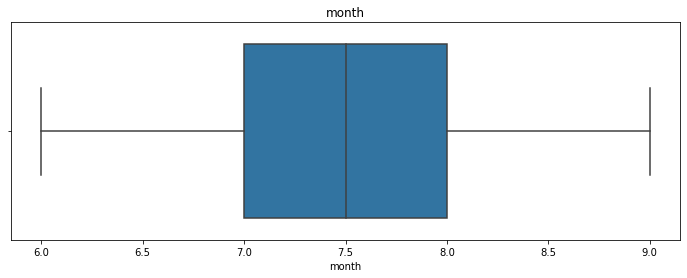

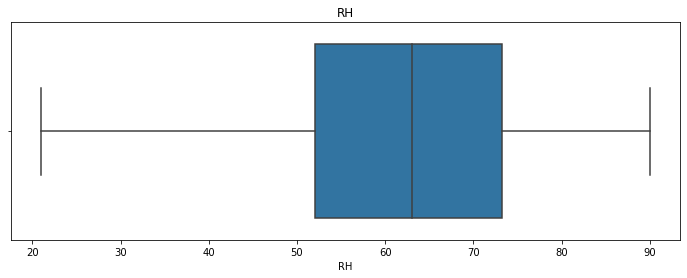

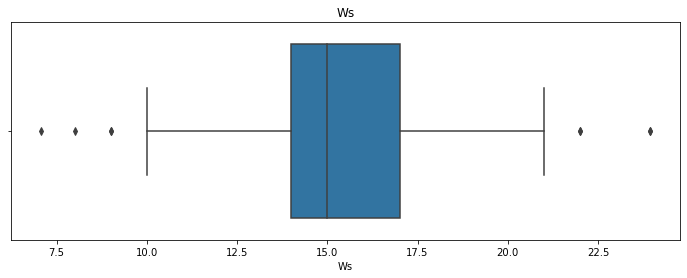

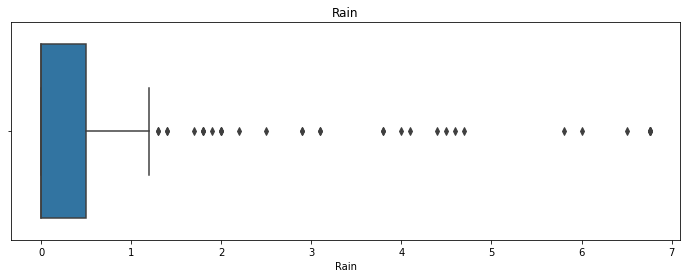

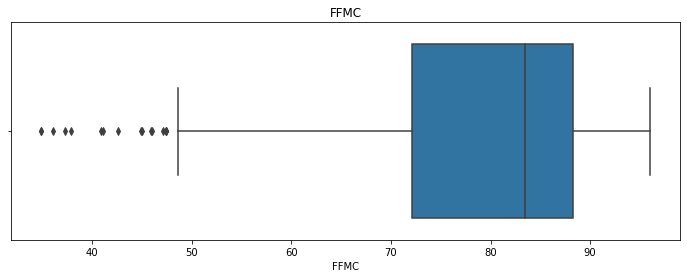

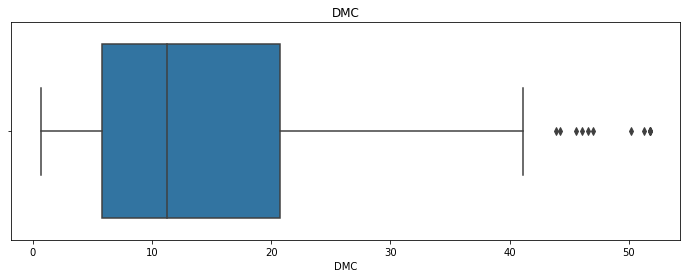

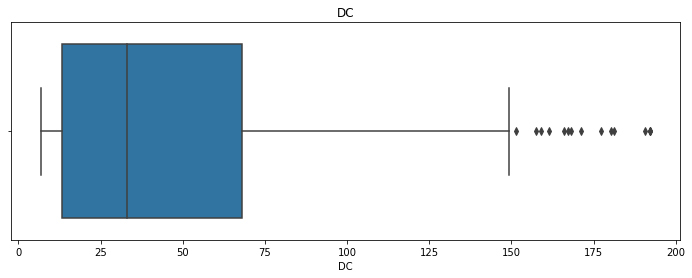

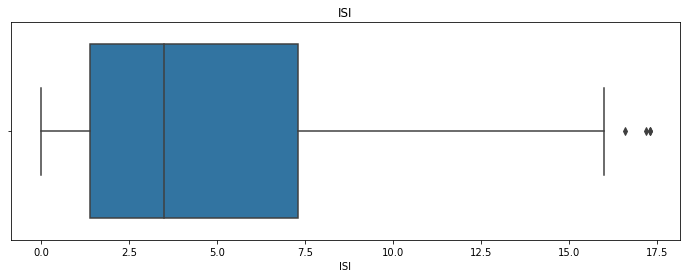

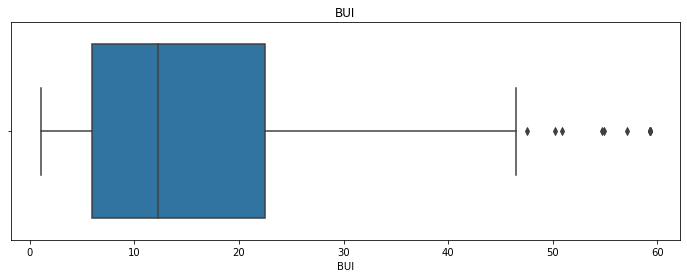

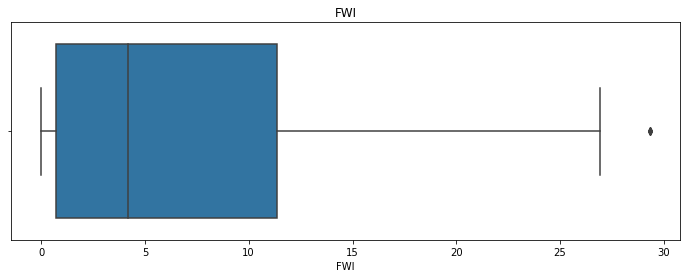

<Figure size 864x288 with 0 Axes>

In [27]:
for col in X.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [28]:
# Finding the IQR
percentile25 = df['Rain'].quantile(0.25)
percentile75 = df['Rain'].quantile(0.75)
print("percentile25",percentile25)
print("percentile75",percentile75)

percentile25 0.0
percentile75 0.5


In [29]:
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 1.25
Lower limit -0.75


In [33]:
df1 = df.copy()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'classes'],
      dtype='object')

In [31]:
def detect_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]
    #return df1[df1[col] < lower_limit]

In [53]:
detect_outliers_IQR('FWI')

percentile25 0.7
percentile75 11.375
Upper limit 27.387500000000003
Lower limit -15.312500000000004


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes


C:\Users\SatyaAnshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SatyaAnshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SatyaAnshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for h

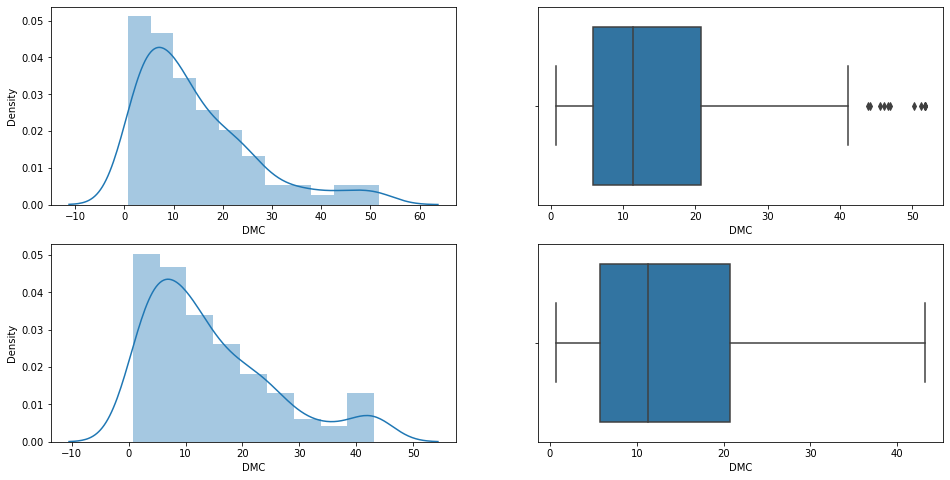

In [49]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['DMC'])

plt.subplot(2,2,2)
sns.boxplot(df['DMC'])

plt.subplot(2,2,3)
sns.distplot(df1['DMC'])

plt.subplot(2,2,4)
sns.boxplot(df1['DMC'])

plt.show()

In [54]:
df.skew()

day            0.002806
month          0.000000
year           0.000000
Temperature   -0.196309
RH            -0.237964
Ws             0.191861
Rain           2.928275
FFMC          -1.277578
DMC            1.330122
DC             1.407513
ISI            1.072072
BUI            1.339929
FWI            1.114838
dtype: float64

In [55]:
df1.skew()

day            0.002806
month          0.000000
year           0.000000
Temperature   -0.175783
RH            -0.237964
Ws             0.177613
Rain           1.246290
FFMC          -1.073835
DMC            1.089909
DC             1.159334
ISI            1.021607
BUI            1.021143
FWI            1.057544
dtype: float64

In [56]:
df1.to_csv('forest_outliers_removed1')